In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*arg, **kwargs):
  pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

%matplotlib inline

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [26]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [28]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
len(train.columns)

81

In [30]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
## Missing Sales Price -> This sould be the target

In [32]:
print('Train Data Shape Before Dropping : {}'.format(train.shape))
print('Test Data Shape Before Dropping : {}'.format(test.shape))

Train Data Shape Before Dropping : (1460, 81)
Test Data Shape Before Dropping : (1459, 80)


In [0]:
# save ID column
train_ID = train['Id']
test_ID = test['Id']

In [0]:
# DROP ABOVE SINCE ITS UNNECESSARY
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [35]:
# CHECKING-

print('Train Data Size After Dropping: {}'.format(train.shape))
print('Test Data Size After Dropping: {}'.format(test.shape))

Train Data Size After Dropping: (1460, 80)
Test Data Size After Dropping: (1459, 79)


## Data Processing
### Outliers -> I don't think I would look for outliers (link inactivated for documentation-)

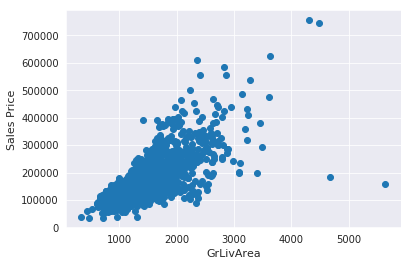

In [36]:
fig, ax = plt.subplots()

ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])

plt.ylabel('Sales Price', fontsize=11)
plt.xlabel('GrLivArea', fontsize=11)

plt.show()

In [0]:
## dots on bottom rightside -> outliers! should delete it before digging in-

In [0]:
# Deleting them- but WHY index at the back?????
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

In [39]:
train.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1458)

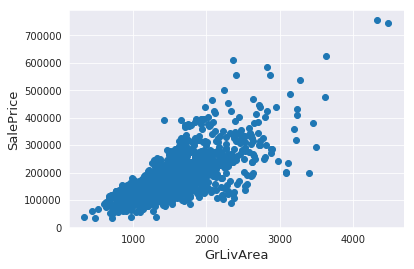

In [40]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Target Variable


 mu = 180932.92 and sigma = 79467.79



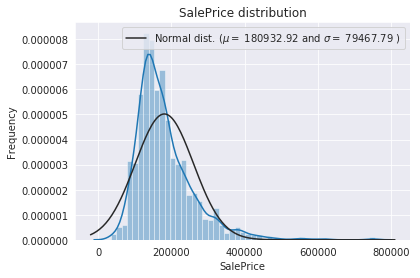

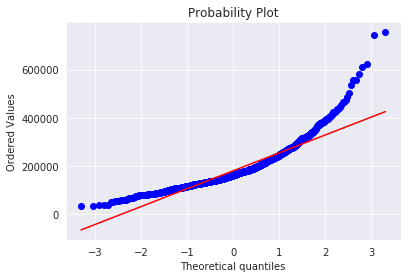

In [43]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [0]:
# 그래프가 너무 왼쪽으로 치우쳐졌음-

### Log-transformation of the target variable


 mu = 0.38 and sigma = 0.00



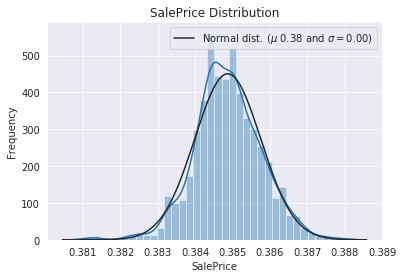

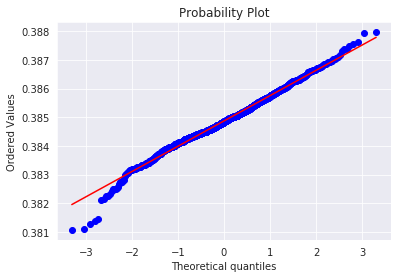

In [52]:
train['SalePrice'] = np.log1p(train['SalePrice'])

#check the new distribution

sns.distplot(train['SalePrice'], fit=norm);

# get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plt the distribution
plt.legend(['Normal dist. ($\mu$ {:.2f} and $\sigma=${:.2f})'.format(mu, sigma)],loc = 'best')

plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# Get also the QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### Feature Engineering

In [53]:
ntrain=train.shape[0]
ntest = test.shape[0]

y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)

all_data.drop(['SalePrice'], axis=1, inplace=True)

print("all_data size is :{}".format(all_data.shape))

all_data size is :(2917, 79)


Missing Data

In [57]:
### 2번째 줄 이해 안감 - 앞과 마찬가지. df['A'].index 형-
all_data_na = (all_data.isnull().sum()/len(all_data))*100

all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})

missing_data.head(20)

,Missing Ratio
PoolQC,99.69
MiscFeature,96.40
Alley,93.21
Fence,80.43
FireplaceQu,48.68
LotFrontage,16.66
GarageQual,5.45
GarageCond,5.45
GarageFinish,5.45
GarageYrBlt,5.45


Text(0.5, 1.0, 'Percent Missing Data by Feature')

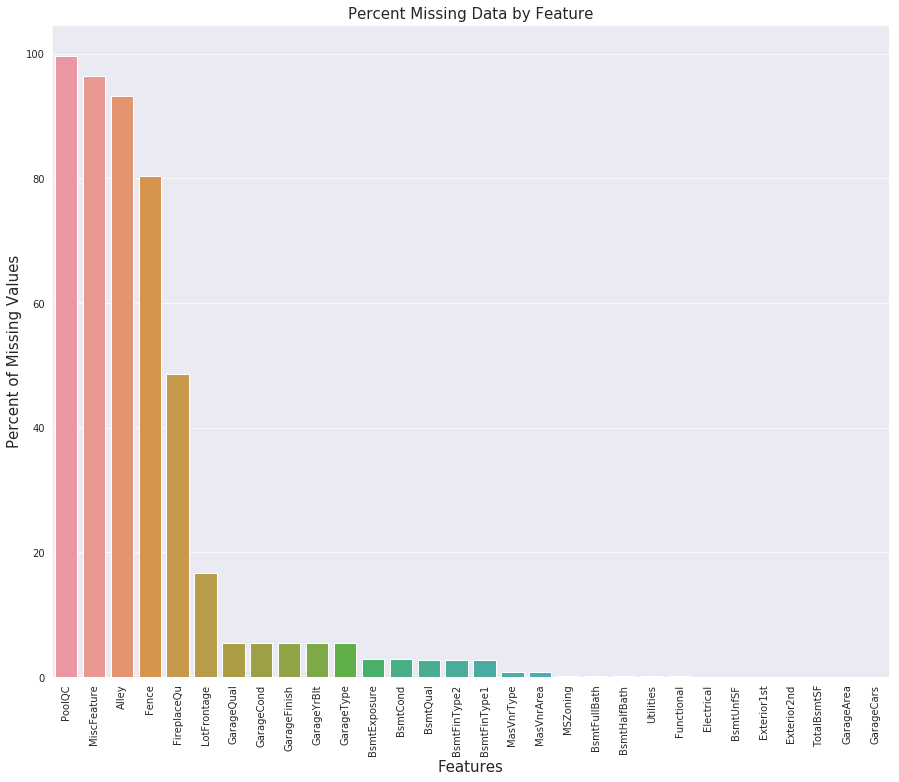

In [58]:
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Feature', fontsize=15)

### Data Correlation

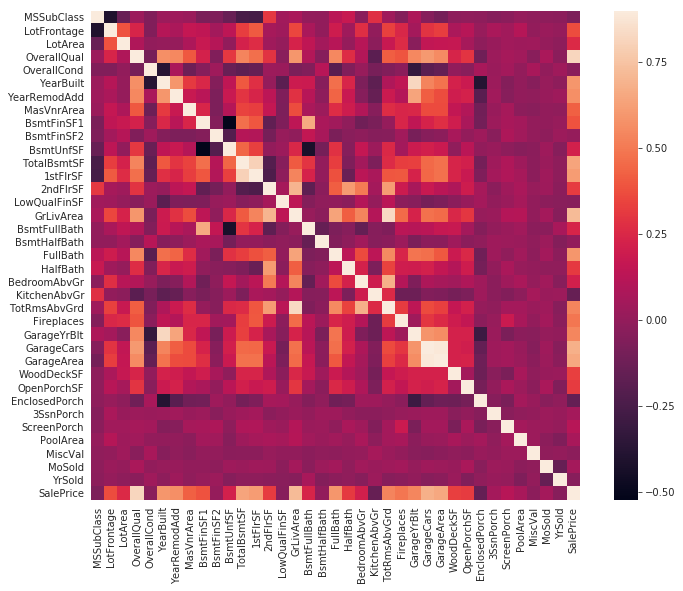

In [59]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

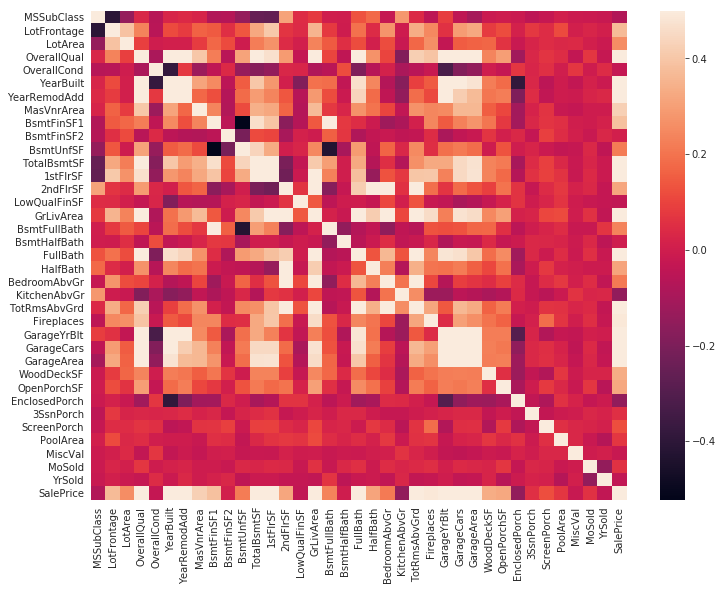

In [61]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.5, square=False)

Missing Value Input

In [0]:
### PoolQC -> 99% missing data->'NONE'

In [0]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

In [0]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [0]:
all_data['Alley'] = all_data['Alley'].fillna('None')

In [0]:
all_data['Fence'] = all_data['Fence'].fillna('None')

In [0]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [0]:
#LotFrontage -> fill in the issingvalue by the median LotFrontage of the neighborhood

In [0]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [0]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'): all_data[col] = all_data[col].fillna('None')

In [0]:
# No Garage = no cars! so GarageYrBlt, GarageArea and GarageCars to ZERO!!!

In [0]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'): all_data[col] = all_data[col].fillna(0)

In [0]:
# No BASEMENT->0

In [0]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'): all_data[col] = all_data[col].fillna(0)

In [0]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'): all_data[col] = all_data[col].fillna('None')

In [0]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [0]:
# since'RL' is the most common value, we can fill MSZoning na value with RL

In [0]:
# 이 식 잘 이해 안감..mode()[0]?????
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [0]:
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove i

In [83]:
all_data['Utilities'].sort_values()

0       AllPub
1939    AllPub
1940    AllPub
1941    AllPub
1942    AllPub
1944    AllPub
1945    AllPub
1946    AllPub
1947    AllPub
1938    AllPub
1948    AllPub
1950    AllPub
1951    AllPub
1952    AllPub
1953    AllPub
1954    AllPub
1955    AllPub
1956    AllPub
1957    AllPub
1949    AllPub
1937    AllPub
1936    AllPub
1935    AllPub
1916    AllPub
1917    AllPub
1918    AllPub
1919    AllPub
1920    AllPub
1921    AllPub
1922    AllPub
         ...  
998     AllPub
999     AllPub
980     AllPub
979     AllPub
978     AllPub
977     AllPub
958     AllPub
959     AllPub
960     AllPub
961     AllPub
962     AllPub
963     AllPub
964     AllPub
965     AllPub
966     AllPub
956     AllPub
967     AllPub
969     AllPub
970     AllPub
971     AllPub
972     AllPub
973     AllPub
974     AllPub
975     AllPub
976     AllPub
968     AllPub
2916    AllPub
943     NoSeWa
1913       NaN
1943       NaN
Name: Utilities, Length: 2917, dtype: object

In [0]:
all_data = all_data.drop(['Utilities'], axis=1)

In [0]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [0]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [0]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [0]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [0]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [0]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')

In [0]:
## any missing value left?

In [92]:
all_data.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
                ..
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
MiscFeature      0
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
PoolQC           0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType    

In [95]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100

all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})
missing_data.head()

,Missing Ratio


## More Features Engineering

### Transforming Some Numerical Variables That Are Really Categorical

In [0]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### Label Encoding Application to Some Categorical Variables that may Contain Information in their Original Set

In [0]:
from sklearn.preprocessing import LabelEncoder

In [98]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features

for c in cols:
  lbl = LabelEncoder()
  lbl.fit(list(all_data[c].values))
  all_data[c] = lbl.transform(list(all_data[c].values))
  
# shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


### Adding One More Important Feaure

In [0]:
# Adding total sqfootage feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Skewed Features -> 이건 왜 하는지 모르겠음..

In [100]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
numeric_feats

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC',
       'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold', 'TotalSF'],
      dtype='object')

In [101]:
# check the skewness of all numerical features

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('\n Skew in Numerical Features: \n')

skewness = pd.DataFrame({'Skew' : skewed_feats})
skewness.head(10)


 Skew in Numerical Features: 



,Skew
MiscVal,21.94
PoolArea,17.69
LotArea,13.11
LowQualFinSF,12.08
3SsnPorch,11.37
LandSlope,4.97
KitchenAbvGr,4.30
BsmtFinSF2,4.14
EnclosedPorch,4.00
ScreenPorch,3.95


### Box Cox Transformation of (highly) skewed features -> 이것도 잘 모르겠음;ㅣ

In [102]:
skewness = skewness[abs(skewness) >0.75]
print('There are {} skewed numerical features to Box Cox transform'.format(skewness.shape[0]))

There are 59 skewed numerical features to Box Cox transform


In [0]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15

for feat in skewed_features:
  all_data[feat] = boxcox1p(all_data[feat], lam)

### Getting Dummy Categorical Features

In [104]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


### Getting the new Train and Test Sets

In [0]:
train = all_data[:ntrain]
test = all_data[ntrain:]

## Modeling
### Importing Libraries

In [0]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### Define a Cross Validation Strategy

In [0]:
# validation function

n_folds = 5

def rmsle_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
  rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error',
                                 cv=kf))
  return(rmse)

### Base Models

#### Lasso Regression -> sensitive to outliers


In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

#### Elastic Net Regression :
again made robust to outliers

In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))

#### Kernel Ridge Regression 

In [0]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#### Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                  max_depth=4, max_features='sqrt',
                                  min_samples_leaf=15, min_samples_split=10,
                                  loss='huber', random_state=5)

#### XGBoost :

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                            learning_rate=0.05, max_depth=3,
                            min_child_weight=1.7817, n_estimators=2200,
                            reg_alpha=0.4640, reg_lambda=0.8571,
                            subsample=0.5213, silent=1,
                            random_state=7, nthread=-1)

#### LightGBM :

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Base Models Scores

In [119]:
score = rmsle_cv(lasso)
print('\nLasso score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))


Lasso score: 0.0008 (0.0000)



In [120]:
score = rmsle_cv(ENet)
print('ElasticNet score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

ElasticNet score: 0.0008 (0.0000)



In [121]:
score = rmsle_cv(KRR)
print('Kernal Ridge Score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

Kernal Ridge Score: 0.0008 (0.0001)



In [122]:
score = rmsle_cv(GBoost)
print('Gradient Boosting Score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

Gradient Boosting Score: 0.0004 (0.0000)



In [123]:
score = rmsle_cv(model_xgb)
print('Xgboost score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

Xgboost score: 0.0011 (0.0000)



In [125]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LGBM score: 0.0003 (0.0000)



### Stacking Models

#### Averaged Base Models Class

In [0]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
  def __init__(self, models):
    self.models = models
    
  def fit(self, X, y):
    self.models_ = [clone(x) for x in self.models]
    
    for model in self.models_:
      model.fit(X, y)
      
    return self
  
  
  def predict(self, X):
    predictions = np.column_stack([model.predict(X) for model in self.models_])
    
    return np.mean(predictions, axis=1)

#### Averaged Base Models Score

In [130]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print('Averaged Base Models Score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

Averaged Base Models Score: 0.0005 (0.0000)



#### Less simple Stacking : Adding a Meta-model

#### Stacking Averaged Models Class

In [0]:
# class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
#   def __init__(self, base_models, meta_model, n_folds = 5):
#     self.base_models = base_models
#     self.meta_model = meta_model
#     self.n_folds = n_folds
    
#   def fit(self, X, y):
#     self.base_models_= [list() for x in self.base_models]
#     self.meta_model_= clone(self.meta_model)
#     kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
    
#     out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
    
#     for i, model in enumerate(self.base_models):
#       for train_index, holdout_index in kfold.split(X, y):
        
#         instance = clone(model)
#         self.base_models_[i].append(instance)
#         instance.fit(X[train_index], y[train_index])
#         y_pred = instance.predict(X[holdout_index])
#         out_of_fold_predictions[holdout_index, i] = y_pred
        
#         self.meta_model_.fit(out_of_fold_predictions, y)
#         return self
      
#     def predict(self, X):
#       meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
#                                       for base_models in self.base_models_])
      
#       return self.meta_model_.predict(meta_features)
      

In [0]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

#### Stacking Averaged Models Score

In [139]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.0008 (0.0000)


### Ensembling StackedRegressor, XGBoost and LightGBM

In [0]:
def rmsle(y, y_pred):
  return np.sqrt(mean_squared_error(y, y_pred))

### Final Training and Prediction

#### StackedRegressor

In [141]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0007821376248879492


#### Boost:



In [143]:
model_xgb.fit(train,y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.0010410482616287616


#### LightGBM:

In [144]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.00016543187173388994


In [145]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.0006866522819533586
